In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t
import math

with open('Москва_2021.txt', 'r') as file:
    data = list(map(int, file.read().split('\n')))


In [24]:
def count_mathematical_expectation(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = 0

    for val in num_of_occurrences:
        mat_exp += (num_of_occurrences[val] / len(data)) * val

    return mat_exp


def count_dispersion(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = count_mathematical_expectation(data)
    dispersion = 0

    for val in num_of_occurrences:
        dispersion += (val - mat_exp) ** 2 * (num_of_occurrences[val] / len(data))
    
    return dispersion


def count_sko(data):
    return count_dispersion(data) ** 0.5


def count_avg(data: list):
    return sum(data) / len(data)


def count_avg(data: list):
    return sum(data) / len(data)

def count_mathematical_expectation(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = 0

    for val in num_of_occurrences:
        mat_exp += (num_of_occurrences[val] / len(data)) * val

    return mat_exp


def count_dispersion(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = count_mathematical_expectation(data)
    dispersion = 0

    for val in num_of_occurrences:
        dispersion += (val - mat_exp) ** 2 * (num_of_occurrences[val] / len(data))
    
    return dispersion


def count_sko(data):
    return count_dispersion(data) ** 0.5


def count_var_coef(data):
    return count_sko(data) / count_mathematical_expectation(data)

def count_moda(data):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 
    
    max_val = max(num_of_occurrences, key=num_of_occurrences.get)
    max_val_freq = num_of_occurrences[max_val] / len(data)

    return [max_val, num_of_occurrences[max_val], len(data)]

def count_razmax(data):
    return max(data) - min(data)

def find_second_max_and_min(data):

    sorted_data = sorted(set(data))
    
    return sorted_data[1], sorted_data[-2]

def find_k_momentum(data: list, k: int):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 
    
    mat_exp = count_mathematical_expectation(data)

    momentum = 0

    for val in num_of_occurrences:
        momentum += (val - mat_exp) ** k * (num_of_occurrences[val] / len(data))
    
    return momentum

def count_asymmetry(data):
    return find_k_momentum(data, 3) / (count_sko(data) ** 3)

def count_excess(data):
    return find_k_momentum(data, 4) / (count_sko(data) ** 4) - 3


def count_median(data):
    if len(data) % 2 == 1:
        m = (len(data)-1) // 2
        return sorted(data)[m+1]
    else:
        m = len(data) // 2
        return (sorted(data)[m] + sorted(data)[m+1])/2


1. Из генеральной совокупности сгенерировать 36 выборок одинакового
объема, для каждой из которых найти выборочную среднюю. Объем
определить по схеме повторной выборки так, чтобы с надежностью γ = 0,95
обеспечить точность оценки математического ожидания δ = 3 года.

In [25]:

sigma = np.std(data)
z = 1.96
delta = 3
n = (z * sigma / delta)**2
n = int(np.ceil(n))
sample_means = []
last_choice_select = []
for i in range(36):
    sample = np.random.choice(data, size=n, replace=True)
    last_choice_select = np.copy(sample)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
print("Размер выборки:", n)
print("Кол-во средних:", len(sample_means))
print("Выборочные средние:", sample_means)

Размер выборки: 62
Кол-во средних: 36
Выборочные средние: [37.54838709677419, 32.725806451612904, 35.193548387096776, 38.67741935483871, 34.25806451612903, 32.25806451612903, 35.96774193548387, 34.806451612903224, 35.306451612903224, 34.45161290322581, 33.54838709677419, 35.79032258064516, 35.25806451612903, 34.016129032258064, 36.96774193548387, 35.33870967741935, 35.774193548387096, 37.83870967741935, 35.483870967741936, 36.693548387096776, 37.903225806451616, 34.016129032258064, 38.806451612903224, 35.24193548387097, 35.064516129032256, 34.66129032258065, 35.70967741935484, 31.693548387096776, 36.38709677419355, 37.274193548387096, 33.854838709677416, 37.935483870967744, 32.096774193548384, 33.225806451612904, 36.66129032258065, 35.354838709677416]


2. На основании полученных значений выборочных средних построить
интервальный ряд распределения, в котором левая граница – округленное
вниз минимальное значение выборочной средней, правая граница –
округленное вверх максимальное значение выборочной средней, длина
интервала – 1 год. Вычислить относительные частоты, построить
гистограмму

In [26]:

# минимальное и максимальное значения выборочных средних
min_value = int(np.floor(min(sample_means)))
max_value = int(np.ceil(max(sample_means)))

# количество интервалов
num_intervals = max_value - min_value + 1
intervals = np.zeros(num_intervals)
for value in sample_means:
    index = int(value - min_value)
    intervals[index] += 1

# вычисляем относительные частоты
rel_freqs = intervals / len(sample_means)
print("Интервальный ряд распределения:")
for i in range(num_intervals):
    left = min_value + i
    right = min_value + i + 1
    print(f"[{left}; {right}): {intervals[i]} ({rel_freqs[i]:.2f})")


Интервальный ряд распределения:
[31; 32): 1.0 (0.03)
[32; 33): 3.0 (0.08)
[33; 34): 3.0 (0.08)
[34; 35): 6.0 (0.17)
[35; 36): 12.0 (0.33)
[36; 37): 4.0 (0.11)
[37; 38): 5.0 (0.14)
[38; 39): 2.0 (0.06)
[39; 40): 0.0 (0.00)


3. Осуществить выравнивание статистического ряда, найдя точечные
оценки нормального распределения методом моментов. Построить кривую
Гаусса, аппроксимировав ею гистограмму частот.

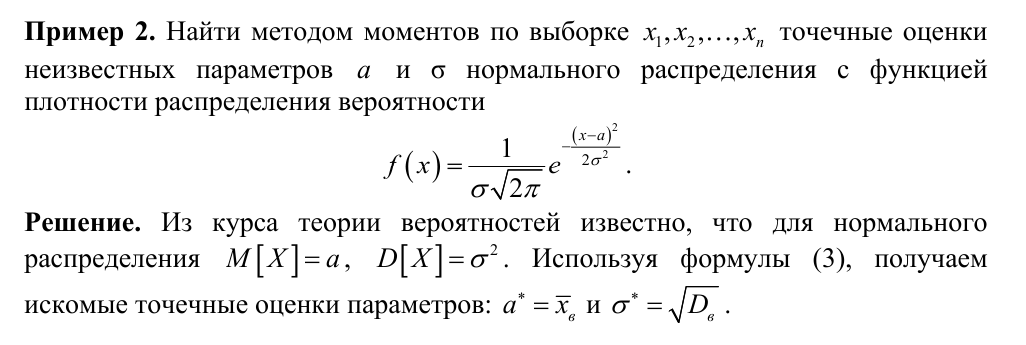

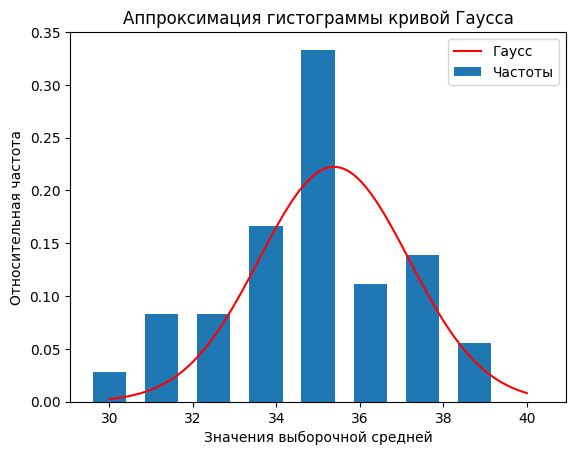

Точечные оценки параметров нормального распределения:
mu = 35.38
sigma = 1.79
1.9996235841149779


In [27]:


# вычисляем выборочные моменты
lastValueRelFreqs = rel_freqs[2]
sample_mean = np.mean(sample_means)
sample_var = np.var(sample_means)

# находим точечные оценки параметров нормального распределения методом моментов
mu = sample_mean
sigma = np.sqrt(sample_var)

# создаем массив значений для построения кривой Гаусса
x = np.linspace(min_value-1, max_value+1, 100)

result = []
for oneValue in x:
  exponentialStep = -((oneValue - mu) ** 2) / (2 * (sigma ** 2))
  distributionValue = (math.exp(exponentialStep)) / (sigma * ((2 * math.pi) ** 0.5))
  result.append(distributionValue)
  #  result.append(1/(sigma * (2*3.14)**0.5) * ((2.71) ** ((-1)*(oneValue - lastValueRelFreqs)/(2*(sigma ** 2)))))

# вычисляем значения плотности нормального распределения
y = norm.pdf(x, mu, sigma)

# нормируем значения плотности, чтобы они соответствовали относительным частотам
y *= len(sample_means) * (max_value - min_value + 1)
plt.bar(np.linspace(min_value-1, max_value+1, len(rel_freqs)),rel_freqs, label='Частоты')
plt.plot(x, result, 'r-', label='Гаусс')
plt.xlabel("Значения выборочной средней")
plt.ylabel("Относительная частота")
plt.title("Аппроксимация гистограммы кривой Гаусса")
plt.legend()
plt.show()
print("Точечные оценки параметров нормального распределения:")
print(f"mu = {mu:.2f}")
print(f"sigma = {sigma:.2f}")
t_value = t.ppf(1 - ((1 - 0.95) / 2), n - 1 )

c_sqrt = 0
for x in last_choice_select:
    c_sqrt += ((x - np.mean(last_choice_select)) ** 2) / (n - 1)
c_sqrt = c_sqrt ** 0.5
print(t_value)

margin_of_error = t_value * c_sqrt / (n ** 0.5)
c_interval = (np.mean(last_choice_select) - margin_of_error, np.mean(last_choice_select) + margin_of_error)


4. На основании одной из сгенерированных выборок найти
доверительный интервал для оценки математического ожидания случайной
величины «возраст» с надежностью 0,95, предполагая, что среднее
квадратическое отклонение неизвестно.

In [28]:


margin_of_error = t_value * c_sqrt / (n ** 0.5)
c_interval = (np.mean(last_choice_select) - margin_of_error, np.mean(last_choice_select) + margin_of_error)

print(f'Исправленное СКО: {c_sqrt}')
print("Доверительный интервал для математического ожидания:", c_interval[0], c_interval[-1], 'те ', np.mean(last_choice_select), '+- ',margin_of_error)
print("Cреднее выборки", np.mean(last_choice_select))
print("Точность: ", margin_of_error)
print(n)


Исправленное СКО: 10.511659060446508
Доверительный интервал для математического ожидания: 32.68537714680304 38.02430027255179
Cреднее выборки 35.354838709677416
Точность:  2.669461562874378
62
